This is for conventional and irregular forc diagrams.

two example of irforc and convential forc data in PmagPy/data_files/forc_diagram/

The input data format could be very different due to different softwares and instruments,

Nevertheless, only if the line ['    Field         Moment   '] included before the measured data, the software will work.

in command line:

python3 forcdiagram /data_files/irforc_example.irforc 3

will plot the FORC diagram with SF=3

In [41]:
%matplotlib inline

In [42]:
#/usr/bin/env python
#--*--coding:utf-8--*--
'''
#=================================================
/this is for process and plot the forc diagrams,
/icluding the conventional and irregualar forc.

/author: Jiabo
/GFZ potsdam
#=================================================
'''
import sys
import os
import codecs
import numpy as np
import itertools
import pandas as pd
from scipy.interpolate import griddata
import time
from matplotlib import pyplot as plt
from pyFORC_log import dataLoad,Fit
from pyFORC_rem import dataLoad_rem
from pyFORC_tf import dataLoad_tf
from pyFORC_in import dataLoad_in
from py_FORC_dataLoad import dataLoad_t,dataLoad_int

In [61]:
class forc_diagram(object):
    def __init__(self, irPath=None,remPath=None):
        
        self.ir_file_path = irPath#self.showDialog()
        self.rem_file_path = remPath#self.showDialog()
        self.data_()
    
    def data_(self):
        self.ir_rawData = dataLoad(fileAdres=self.ir_file_path)
        self.ir_fitData = Fit(irData=self.ir_rawData,SF=3)
        #------------------------------------------------
        self.rem_rawData = dataLoad_rem(fileAdres=self.rem_file_path)
        self.rem_fitData = Fit(irData=self.rem_rawData,SF=3)

        self.tf_rawData = dataLoad_tf(fileAdres=self.rem_file_path)
        self.tf_fitData = Fit(irData=self.tf_rawData,SF=3)

        self.in_rawData = dataLoad_in(tfraw=self.tf_rawData,remraw=self.rem_rawData)
        self.in_fitData = Fit(irData=self.in_rawData,SF=3)
        #self.in_fitData = self.rem_fitData
        #self.in_fitData.Z = np.subtract(self.tf_fitData.Z,self.rem_fitData.Z)


        self.t_rawData = dataLoad_t(tfraw=self.tf_rawData,irraw=self.ir_rawData)
        self.t_fitData = Fit(irData=self.t_rawData,SF=3)

        self.int_rawData = dataLoad_int(remraw=self.rem_rawData,irraw=self.ir_rawData)
        self.int_fitData = Fit(irData=self.int_rawData,SF=3)
        
    def load_irraw(self):
        #irForc = Fit(self.rawDf,SF=3)
        _plotRaw(ax=None, data=self.ir_rawData)

    def load_remraw(self):
        _plotRaw(ax=None, data=self.rem_rawData)

    def ir_plot_buttom(self):
        _plotForc(ax=None,data=self.ir_fitData)

    def rem_plot_buttom(self):
        _plotForc(ax=None,data=self.rem_fitData)

    def in_plot_buttom(self):
        _plotForc(ax=None,data=self.in_fitData)
        
    def tf_plot_buttom(self):
        _plotForc(ax=None,data=self.tf_fitData)

    def t_plot_buttom(self):
        _plotForc(ax=None,data=self.t_fitData)

    def int_plot_buttom(self):
        _plotForc(ax=None,data=self.int_fitData)


In [83]:
def _plotRaw(ax=None,data=None):
    #ax.text(0.5,0.5,'raw')
    #ax.set_xlabel('Field')
    #ax.set_ylabel('Magnetization')
    ax.scatter(data.x,data.y,c=data.z, s=0.1)
    #plt.show()
def _plotForc(ax=None,data=None):
    figure = plt.figure(figsize=(4,4),dpi=100,facecolor='white')
    figure.subplots_adjust(left=0.18, right=0.97,
                    bottom=0.2, top=0.9, wspace=0.5, hspace=0.5)
    ax = figure.add_subplot(111)
    
    ax.contour(data.xi*1000,data.yi*1000,data.Z,9,colors='k',linewidths=0.5)#mt to T
    #plt.pcolormesh(X,Y,Z_a,cmap=plt.get_cmap('rainbow'))#vmin=np.min(rho)-0.2)
    ax.pcolormesh(data.xi*1000,data.yi*1000,data.Z,cmap=plt.get_cmap('rainbow'))#vmin=np.min(rho)-0.2)
    #plt.colorbar()
    #plt.xlim(0,0.15)
    #plt.ylim(-0.1,0.1)
    ax.set_xlabel('B$_{c}$ (mT)',fontsize=12)
    ax.set_ylabel('B$_{i}$ (mT)',fontsize=12)
    
    ax.set_xlim(0,100)
    ax.set_ylim(-100,100)

In [64]:
irPath = '../example/MSM33-60-1-d416_2.irforc'
remPath = '../example/MSM33-60-1-d416_2.remforc'

forcs = forc_diagram(irPath,remPath)

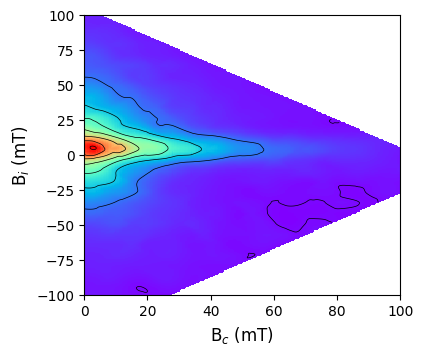

In [84]:
forcs.ir_plot_buttom()

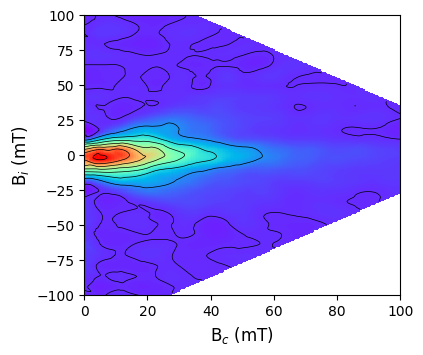

In [85]:
forcs.rem_plot_buttom()

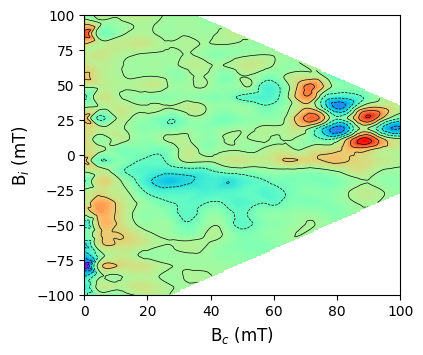

In [86]:
forcs.in_plot_buttom()

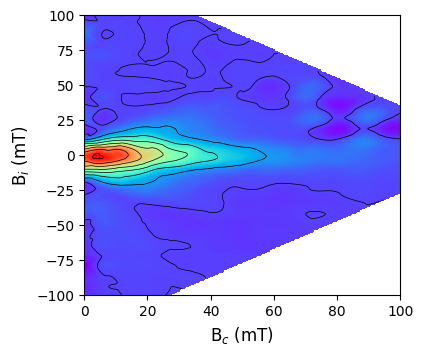

In [87]:
forcs.tf_plot_buttom()

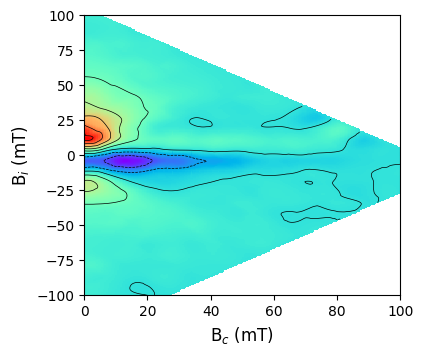

In [88]:
forcs.t_plot_buttom()

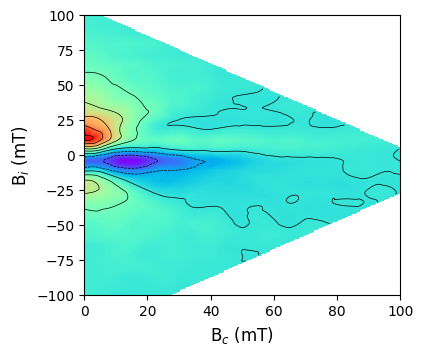

In [89]:
forcs.int_plot_buttom()